---

# Descriptive Statistics-Anything you can discover with a pandas one-liner ;)

### Learning objectives:
* The Two forms of statistics
* Populations vs Samples
* Variable Types
* Univariate vs multivariate analysis
* Measures of Location and Dispersion

### Python packages to be used
* Pandas
* Numpy
* Scipy
* Matplotlib

---

# Two forms of Statistics

Statistics is a set of methods and measures that deal with collecting, cleaning and analyzing a dataset and making quantitative statements about the population. These statements can form two kinds:

* **Descriptive statistics** - aims to describe a given data set visually and through metrics. There is no uncertainty in descriptive statistics! It is a crucial step in every exploratory analysis as we get a better feeling for the data, its characteristics and relationships.

* **Inferential statistics** - aims to infer values for attributes of a population by observing a subsample of that population. There is no certainty in inferential statistics! 


![](descriptive_stats.png)

---

# Population vs Samples

## Population

A population is a group of "all individuals, objects, or measurements whose properties are being studied" - https://openstax.org/books/introductory-statistics/pages/1-key-terms

* Parameters describe a population

## Sample

A sample is a subset of the population. Preferrably it is a representative random subset.

* statistics describe a sample, which estimate the population values

#### The concepts for parameters and statistics are basically the same but sometimes the math differs a bit. In this lecture we'll consider population statistics


---

## Exercise
### Do the following statements describe populations or samples?
* **We worked out the average CPU clock speed of all SPICED students**  - population 
* **We worked out the average CPU clock speed of SPICED students by looknig at the Jalapenalty cohort** - sample
* **We worked out the favourite film of German students** - population 
* **We worked out the favourite film of German students by asking students of the Filminstitut Berlin** - sample

---

# Variable - COLUMNNS IN YOUR DATAFRAME / SQL TABLE

"A characteristic of interest for each person or object in a population (or sample)" - https://openstax.org/books/introductory-statistics/pages/1-key-terms


## Variable types

![](variables.png)

---

### Discrete vs. Continuous Variables

#### Discrete Variables

The values of a discrete variable are countable. They can be finite or infinite.

**For example: ???**

* Countries 
* Age in years / Age in seconds
* Years
* School grades 

#### Continuous Variables

* The values of a continuous variable are uncountable.
* These depend on how precise you want your measurement to be, there is no 'temperature' cf heisenberg
* Continuous becomes discrete when you specify a unit of measurement

**For example: ???**

* height
* weight
* time
* distance
* energy
* price of real estate

---

### Categorical, Ordinal and Metric Variables

#### Categorical Variables - LABELS

The values of categorical variables (also called nominal variables) do not have a natural ordering.


**For example: ???**

* Sex
* Location 
* Colours 
* Species

#### Ordinal Variables - RANKING

The values of ordinal variables have a natural ordering. However, the difference between the values is not measurable.


**For example: ???**

* Questionnaire answer - ratings of 1-5 
* Young / Middle Aged / Senior citizen
* Months of the year - days of the week
* Aesthetic score - 10/10 is not necessariliy beautiful
* Grades 

#### Metric Variables - MEASUREMENTS

The values of metric variables have a natural ordering and the distance between two values is measurable.
The unit of measurement is assumed to be constant throughout the range

**For example: ???**

* Metres
* Kg
* Lightyears

---

### BONUS SECTION

#### Random Variable

Each of the above variables can be produced by a deterministic process (e.g. 1+1 = discrete variable), or by a random process (the height of the first shopper through a shop door on Black Friday Sales). A variable whose value is determined by a random process is called a **random variable**. Python has many random number generators, e.g in `numpy.random`, which sample from different sorts of populations - check out the distribution section [here](https://numpy.org/doc/1.16/reference/routines.random.html)

(array([2., 0., 1., 0., 2., 0., 1., 1., 2., 1.]),
 array([0.18764893, 0.25951607, 0.33138321, 0.40325035, 0.47511749,
        0.54698464, 0.61885178, 0.69071892, 0.76258606, 0.8344532 ,
        0.90632034]),
 <BarContainer object of 10 artists>)

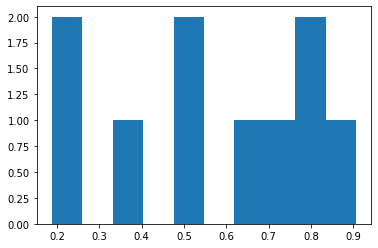

In [23]:
import numpy as np
import matplotlib.pyplot as plt

plt.hist([np.random.random() for x in range(10)])

## Exercise 
* Try and increase / decrease the number of data points sampled. What happens to the chart?
* Try and rewrite this code to sample from a Gaussian (normal) distribution instead? **Hint** numpy.random has lots of different variable types in it.
* Change the number of data points and see what happens to the chart.
* What does this make you think about?

---

### Let's try this out on the penguins dataset

### First import the necessary libraries

In [6]:
import pandas as pd
from scipy import stats
import numpy as np

### Next import the data

In [4]:
df = pd.read_csv('/Users/tom_g/Code/Data/penguins/penguins_simple.csv', sep=';')

---

## Exercise
## For each feature (column) in the dataset:
* Work out the variable type
* Work out the level of measurement (if appropriate)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Species              333 non-null    object 
 1   Culmen Length (mm)   333 non-null    float64
 2   Culmen Depth (mm)    333 non-null    float64
 3   Flipper Length (mm)  333 non-null    float64
 4   Body Mass (g)        333 non-null    float64
 5   Sex                  333 non-null    object 
dtypes: float64(4), object(2)
memory usage: 15.7+ KB


In [8]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

In [7]:
df

,Species,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex
0,Adelie,39.1,18.7,181.0,3750.0,MALE
1,Adelie,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,FEMALE
329,Gentoo,46.8,14.3,215.0,4850.0,FEMALE
330,Gentoo,50.4,15.7,222.0,5750.0,MALE
331,Gentoo,45.2,14.8,212.0,5200.0,FEMALE


* **Everythning except Species and Sex - continuous**
* **Species & Sex - Categorical**

---

 ## Univariate vs multivariate analysis

* Univariate analysis concerns the relationship of **one variable with itself**

* Multivariate analysis concerns the relationship of **one variable with one (or more) others**

---

## Univariate analysis

* We are looking at probability distrubtions on populations, which we estimate by sampling
* We estimate the population by measuring **centrality/location**, as well as **dispersion/variation**

---

## Measures of Central Tendency/Location

Measures of central tendency are concerned with the question what a typical value of the variable is.

#### Mean

- Arithmetic mean: 
$\frac{\sum_{i=1}^n x_i}{n}$

--- 
### BONUS SECTION

- Weighted arithmetic mean
$\frac{w_1*x_1 + w_2*x_2 + ... + w_n*x_n}{n}$


- Geometric mean
$\sqrt[n]{\prod_{i=1}^n x_i}$


- Harmonic Mean
$\frac{n}{\sum_{i=1}^n \frac{1}{x_i}}$

---


**Question: Why do we concern ourselves with different concepts of the mean?**

* When we're dealing with values that you multiply together, e.g. compound rate of change - sales, capital growth rates, stocks - GEOMETRIC
* When we're dealing with ratios, - HARMONIC - (cf next week's F1 Score)
* Arithmetic mean == weighted arithmetic mean where all weights are 1

---

## Exercise
## Pick a column in the penguins dataset
* Work out the arithmetic mean yourself
* Try and find a prewritten function which does it for us

In [12]:
# i need to calculate the mean of this column
df['Culmen Length (mm)']

# i know mean is the sum of every number divided by the number of data points (length of the column)
# therefore i do.....

0      39.1
1      39.5
2      40.3
3      36.7
4      39.3
       ... 
328    47.2
329    46.8
330    50.4
331    45.2
332    49.9
Name: Culmen Length (mm), Length: 333, dtype: float64

In [26]:
sum(df['Culmen Length (mm)'])/len(df['Culmen Length (mm)'])
df['Body Mass (g)'].mean()

4207.057057057057

In [13]:
df.columns

Index(['Species', 'Culmen Length (mm)', 'Culmen Depth (mm)',
       'Flipper Length (mm)', 'Body Mass (g)', 'Sex'],
      dtype='object')

---


#### Median

The value that divides the sample into two groups of equal size. The probability of observing a value larger than the median and the probability of observing a value smaller than the median in the sample are 50% each.

* Less prone to outliers than mean because it doesn't care about outliers, just finds the middle value
* Median != mean, then Ive got some weird outliers
* Median < Mean - outliers with large values
* Median > Mean - outliers with small values
* IF THE COUNT OF YOUR VARIABLE IS ODD, the median is the value at index len(column)//2 - value in the middle!!
* in python, single / provides a float division, a double rounds down to an integer
* IF THE COUNT OF YOUR VARIABLE IS EVEN, you need ot find the average of the two middle values - len(column)//2, len(column)//2+1

In [28]:
x = list(range(11))
med_odd = x[len(x)//2]
med_odd

5

In [40]:
# challenge - work out the median for an array with even length
x = list(range(10))
med_even = (x[int(len(x)/2-1)] + x[int(len(x)/2)]) / 2
med_even

4.5

#### Mode

The Mode of a variable is the value that occurs most often in the dataset.


**Question: Why do we concern ourselves with different concepts of centrality?**

---

## Measures of Dispersion (or Variability)

Measures of dispersion are concerned with the question how far the values of the variable diverge from the measures of central tendency.

#### Variance

$\frac{\sum_{i=1}^n (x_i - \overline{x})^2}{n}$

#### Standard Deviation

$\sqrt{Variance}$


**Question: Why do we concern ourselves with different concepts of dispersion?**

* variance is squared because otherwise negative distances cancel out the positive distances
* variance is therefore no longer in the unit of measurement of the variable
* thats why we calcualte the square root, so its in the original unit of measurement of the variable

---


#### Quantile

A generalization of the concept of the median. The qth-Quantile of the variable are those values that divide the sample into q groups of equal size. One commonly used Quantile is the 4-Quantile or Quartile, which divides the sample into 4 groups of equal size.

* Two common ways of looking at quantiles in python are q-q plots and boxplots

<AxesSubplot:>

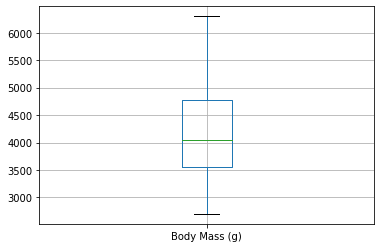

In [25]:
df.boxplot('Body Mass (g)')

**Question: What other quantiles might be good to use?**


#### Range

$Maximum - Minimum$

#### Inter-Quartil-Range (IQR)

$Q_{0.75} - Q_{0.25}$

#### Boxplot

A visual representation of the variability.

---

### Measures of Symmetry and Curvature

#### Skewness - is the peak of the distribution in the middle, or to the side?

$\frac{1}{n}*\frac{\sum_{i=1}^n (x_i - \overline{x})^3}{\sigma^{3}}$

* Third moment, normalised by sigma cubed


**Shortcut for how to spot skewness**

* If mean = median = mode, then no skewness
* If mean<median<mode = negative skew (tail is left)
* If mean>median>mode = positive skew (tail is right)

![](skewness.jpg)

source: [fromthegensis](https://www.fromthegenesis.com/skewness/)

#### Kurtosis - is the peak taller or shorter than a normal distribution?

$\frac{1}{n}*\frac{\sum_{i=1}^n (x_i - \overline{x})^4}{\sigma^4}$

* Fourth moment, normalised by sigma to the power four
* Mesokurtic - kurtosis of 3 - **normal**
* Leptokurtic - kurtosis of >3 - **peaked**
* platykurtic - kurtosis of <3 - **short**
* it ranges from 1 to $\infty$

![](kurtosis.png)

source: [fromthegensis](https://www.fromthegenesis.com/skewness/)

---

# Summary of what we've learnt

#### We use different techniques to calculate:
* the centrality (mean / mode / median) 
* and variation (variance, standard deviation, quantiles)of a single variable

#### Why do we care about the distribution of the data?
* It helps us to understand our univariate data + HELPS US TO EXPLAIN THE DATA to stakeholders
* Maybe its not normally distributed - maybe its binomial / uniform
* It helps us to predict - it allows to know whether our predictions are reliable or not
* It helps us to know which instruments we can apply
* Parametric vs non-parametric stats (can we rely on assumptions like normal distributions)

#### What can we do if we don't have normal distribution?
* Ask yourself if you should expect one
* Sample more data 
* Feature Engineer your current data
    * Remove outliers 
    * apply a functions which rescales your data 
    * etc etc 

#### How to learn more about stats on youtube!
* 3 Blue 1 Brown
* Statsquests
* Zedstatistics

#### Which packages tend to be useful for stats
* Pandas
* Numpy
* Statsmodels
* Scipy

---

### BONUS SECTION

### Empirical distributions - Probability Density/Mass Function

The probability density function, for continuous variables, and the probability mass function, for discrete variables provide a relative likelihood that the value of the variable would equal that of any given datapoint.

**PMF:**  $\sum_{i=1}^n P(x)$

**PDF:** $P(a≤y≤b) = \int_{a}^{b} f(x) \,dx$

**Question: Why can't we use the same function to evaluate discrete and continuous distributions?**

Closely related is the **cumulative distribution function (cdf)**, which is a function providing the probability that the value of any given datapoint will be less or equal than a certain value.

---


#### Univariate distributions

Frequency table: `.value_counts()`

Histogram: `.hist()`

Cumulaticve Distribution Function 

#### Multivariate distributions

Categorical and Ordinal Variables: `crosstab()`

Metric Variables: `corr()`

---

### Multivariate - NEXT WEEK!
* Crosstab
* Correlation matrix
* Pairplot
* Heatmap

---